## Light Curve and Periodogram of an Eclipsing CVs

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

import lightkurve as lk

In [2]:
# Specify the Eclipsing CVs: 
TIC = 'TIC 3034524'

data_all = lk.search_lightcurve(TIC, author = 'SPOC')

data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 19,2019,SPOC,120,3034524,0.0
1,TESS Sector 43,2021,SPOC,120,3034524,0.0
2,TESS Sector 44,2021,SPOC,120,3034524,0.0
3,TESS Sector 45,2021,SPOC,120,3034524,0.0
4,TESS Sector 59,2022,SPOC,120,3034524,0.0
5,TESS Sector 71,2023,SPOC,120,3034524,0.0
6,TESS Sector 73,2023,SPOC,120,3034524,0.0


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

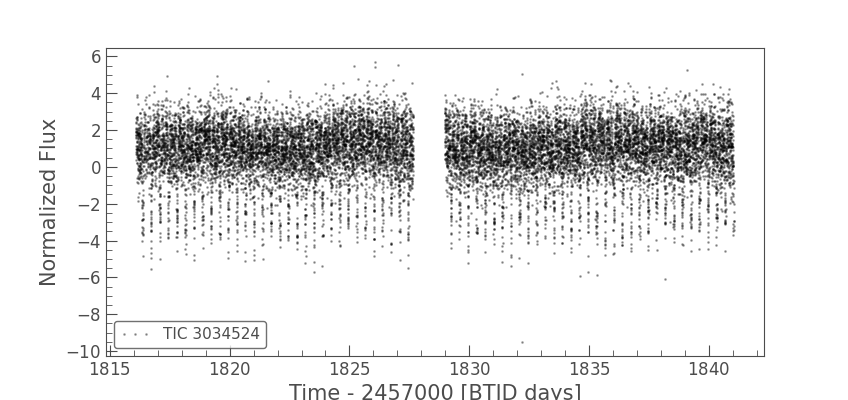

In [3]:
import matplotlib.pyplot as plt

data = data_all[0]

lc = data.download_all().stitch()

lc.plot(linewidth = 0, marker = '.', color = 'k', alpha = 0.3)

(-5.0, 5.0)

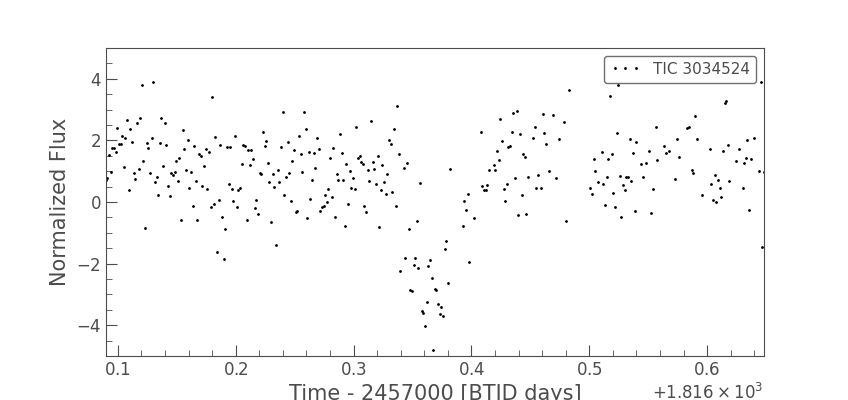

In [4]:
lc.plot(linewidth = 0, marker = '.', color = 'k', alpha = 1)
plt.xlim(1816.09,1816.648)
plt.ylim(-5,5)

<IPython.core.display.Javascript object>


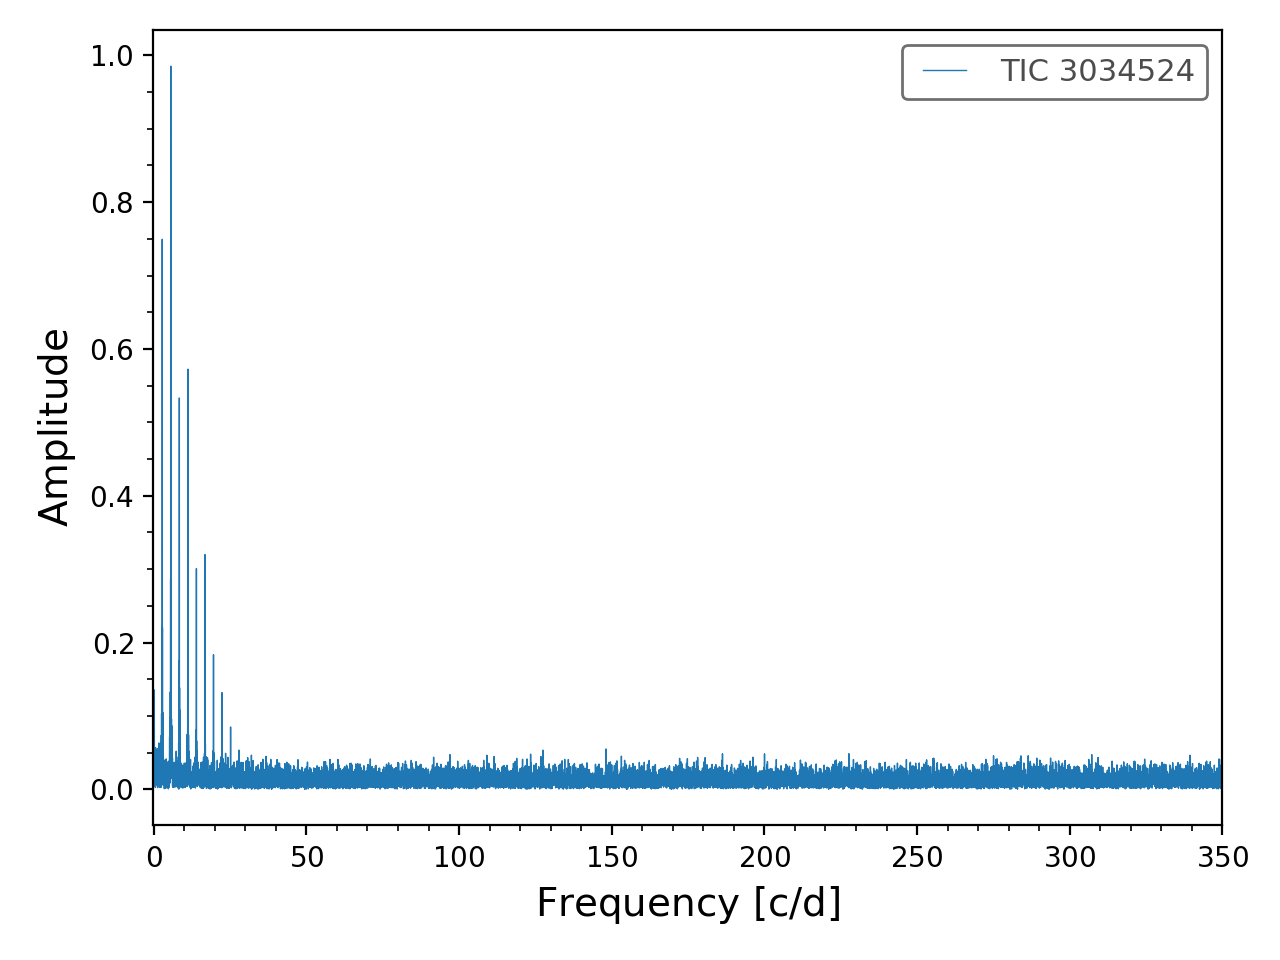

In [6]:
periodogram = lc.to_periodogram()

fig_LS, ax_LS = plt.subplots(1,1,num=4)
periodogram.plot(ax=ax_LS)
ax_LS.set_xlabel(r'${\rm Frequency~[c/d]}$', fontsize=14)
ax_LS.set_ylabel(r'${\rm Amplitude}$', fontsize=14)
ax_LS.set_xlim(-0.2, 350)
fig_LS.tight_layout()

In [7]:
#Second number gotten from the strongest peak of the Periodogram. Changed every time you have a new chart.
period=1/2.7975749990841843

print(period)

0.357452436602186


In [8]:
#Period and time 0 are in BTJD :)
t0=1816.3676

<IPython.core.display.Javascript object>


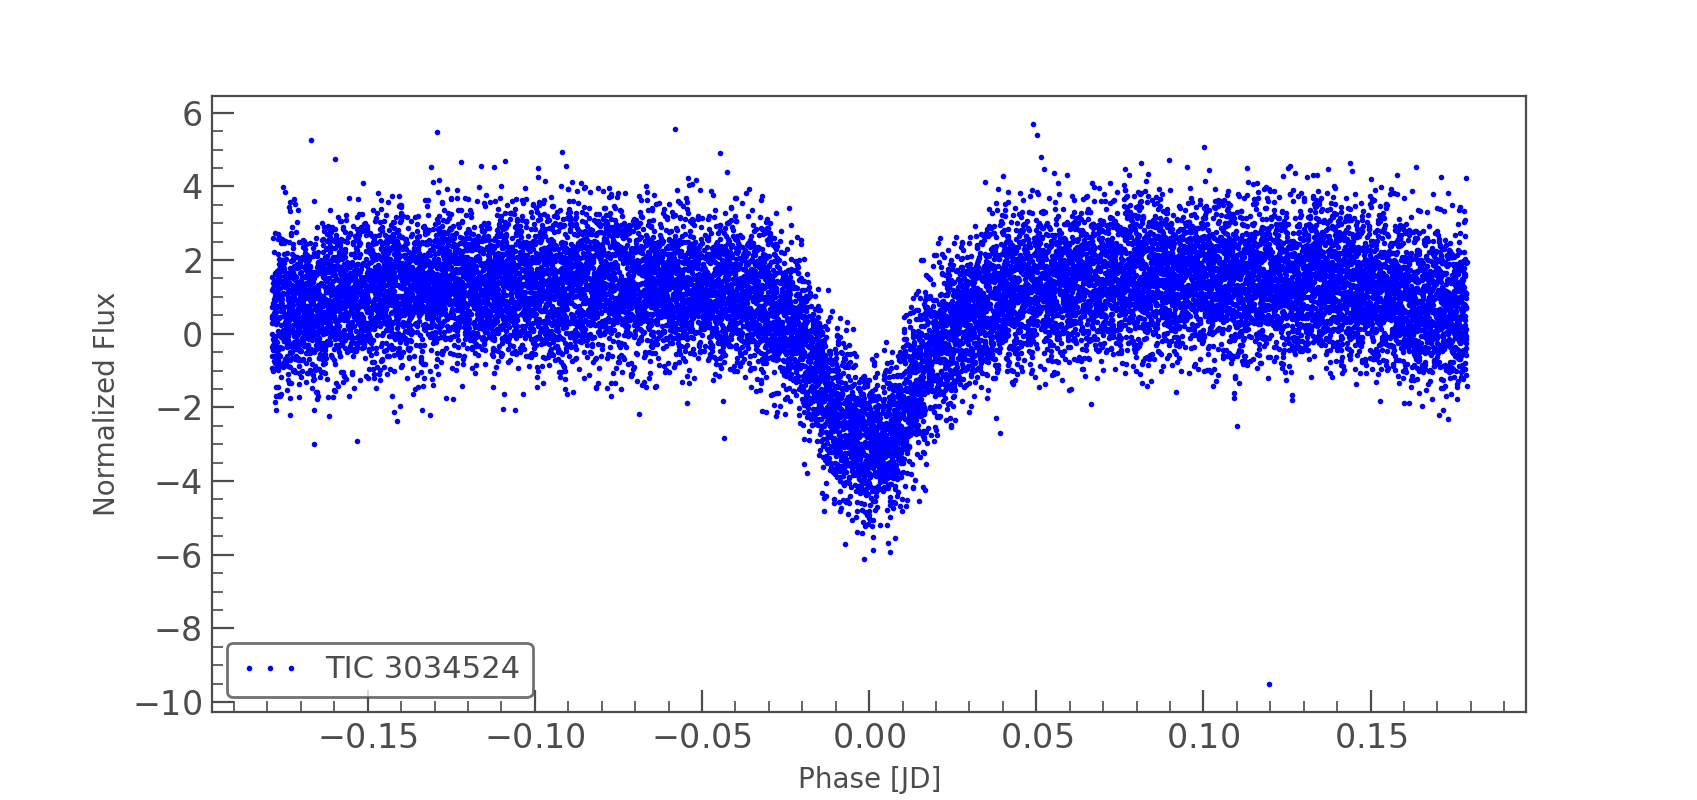

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

In [9]:
lc_phased = lc.fold(period = period, epoch_time = t0)
lc_phased.plot(linewidth = 0, color = 'b', marker = '.')

<IPython.core.display.Javascript object>


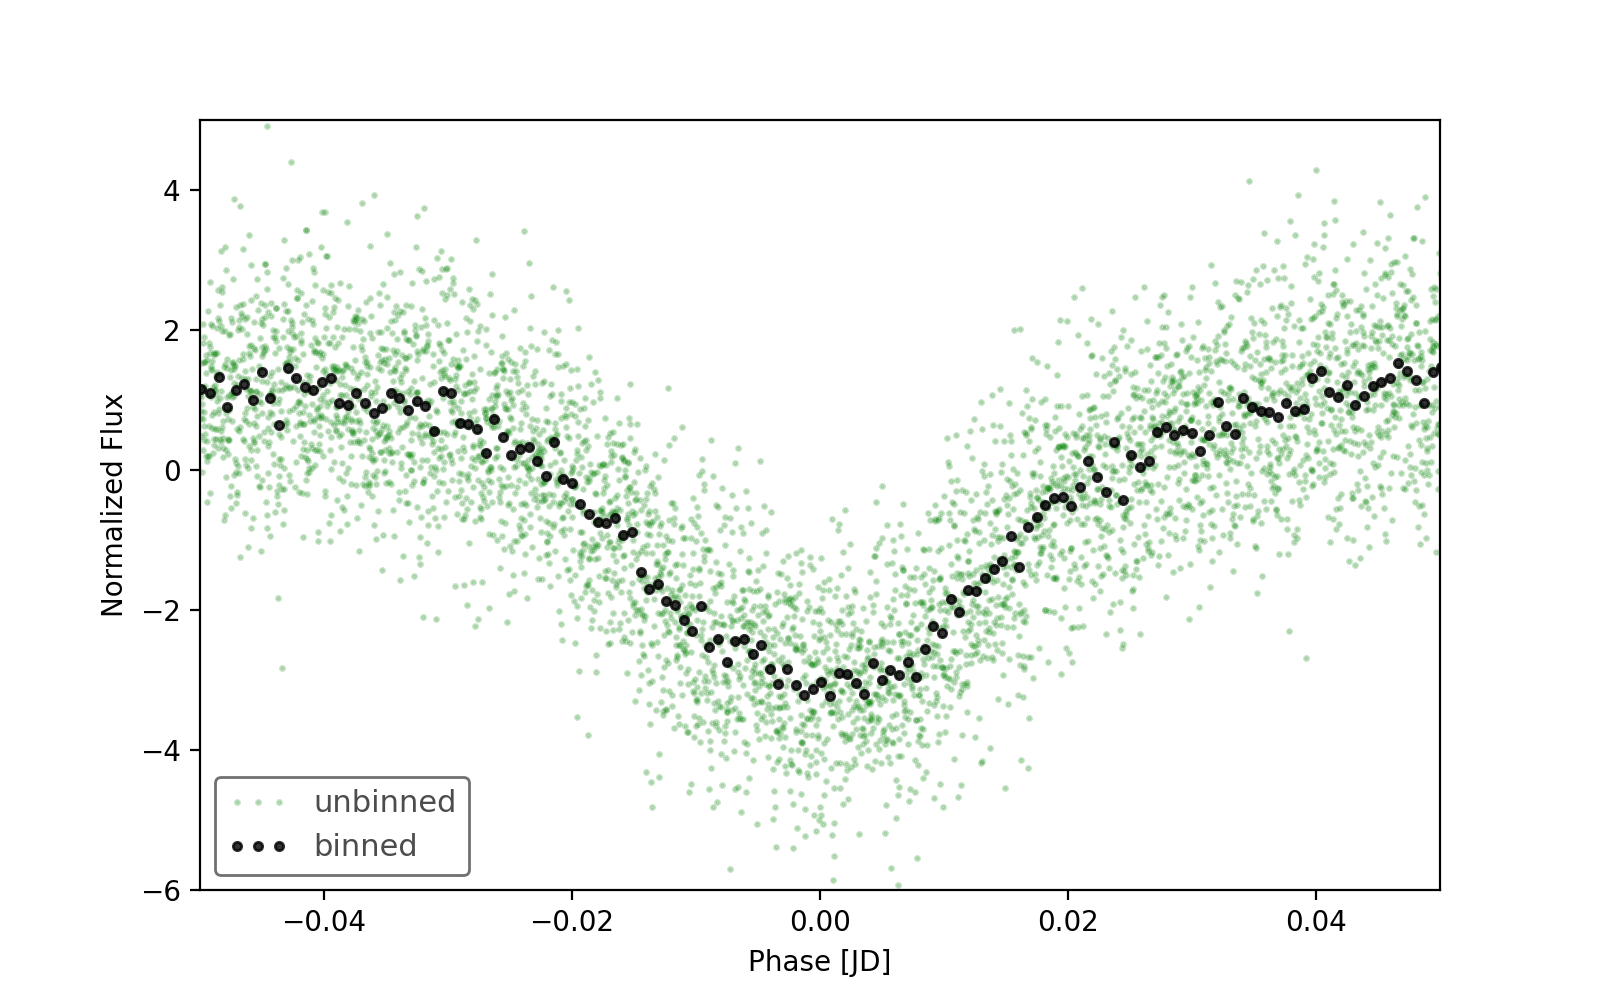

(-6.0, 5.0)

In [10]:
lc_phased_binned = lc_phased.bin(1/24/60)

fig, ax = plt.subplots(figsize = (8,5))

lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'green', alpha = 0.2, markersize = 3, label = 'unbinned')
lc_phased_binned.plot(ax = ax, marker = '.', linewidth = 0, color = 'k', alpha = 0.8, markersize = 6, label = 'binned')

plt.xlim(-0.05,0.05)
plt.ylim(-6,5)